In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('filename.csv')
df.head()

,Unnamed: 0,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
0,NaN,x,y,z,visibility,x,y,z,visibility,x,...,visibility,x,y,z,visibility,x,y,z,visibility,NaN
1,0.0,0.45387566089630127,0.25291261076927185,-0.4726162552833557,0.9999746084213257,0.4641628861427307,0.2374323308467865,-0.4424018859863281,0.9999110698699951,0.4704682230949402,...,0.904472291469574,0.7158914804458618,0.8846787214279175,-0.1009518951177597,0.9572659730911255,0.17994219064712524,0.8820955753326416,-0.11350876837968826,0.908597469329834,goddess
2,1.0,0.5199804306030273,0.3553200662136078,-0.2893471121788025,0.9999963045120239,0.5300899744033813,0.3407396674156189,-0.2517555356025696,0.9999910593032837,0.5351967811584473,...,0.9276442527770996,0.7778192758560181,0.881344199180603,-0.17572136223316193,0.9518364667892456,0.2866743803024292,0.8773733377456665,-0.18581964075565338,0.9529677033424377,goddess
3,2.0,0.5097429752349854,0.2016085684299469,-0.5084507465362549,0.9999451637268066,0.5260564088821411,0.18188431859016418,-0.4516509473323822,0.9998689889907837,0.5360307693481445,...,0.7070011496543884,0.9174155592918396,0.8893077373504639,-0.10302688926458359,0.7406785488128662,0.0688345730304718,0.9035977721214294,-0.20925270020961761,0.757455050945282,goddess
4,3.0,0.5331723690032959,0.2124204933643341,-0.19973768293857574,0.9999948740005493,0.5445216298103333,0.19283027946949005,-0.1664387434720993,0.9999876022338867,0.552772581577301,...,0.8672261834144592,0.851805567741394,0.9082602262496948,-0.18402208387851715,0.9015532732009888,0.27015939354896545,0.8946938514709473,-0.12455032020807266,0.8768011927604675,goddess


In [3]:
df.iloc[15:25]

,Unnamed: 0,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
15,14.0,0.5859074592590332,0.1976589560508728,-0.28885892033576965,0.9999803304672241,0.5936634540557861,0.18345704674720764,-0.25116029381752014,0.9999409914016724,0.5973769426345825,...,0.6707456707954407,0.7269823551177979,0.9189807772636414,0.030366893857717514,0.8781733512878418,0.41871681809425354,0.9226245880126953,-0.05626417323946953,0.8114736676216125,goddess
16,15.0,0.539297342300415,0.4211137890815735,0.25568774342536926,0.9999995231628418,0.5364826321601868,0.41090068221092224,0.233986958861351,0.9999992847442627,0.5342445373535156,...,0.999797523021698,0.4019673466682434,0.9128552675247192,0.05938328802585602,0.999383807182312,0.7063408493995667,0.9051358103752136,0.12087180465459824,0.9994252920150757,goddess
17,16.0,0.5150116086006165,0.1981530785560608,-0.6016842722892761,0.999996542930603,0.523295521736145,0.18406039476394653,-0.5608338117599487,0.9999886751174927,0.5304345488548279,...,0.8334271311759949,0.7163697481155396,0.8424278497695923,0.15432460606098175,0.9674296975135803,0.31211918592453003,0.8455696105957031,0.0757741704583168,0.9647908210754395,goddess
18,17.0,0.48537328839302063,0.20999634265899658,-0.42737188935279846,0.9999326467514038,0.5013352632522583,0.19190937280654907,-0.3710635304450989,0.9998264908790588,0.5101264119148254,...,0.84149169921875,0.8713654279708862,0.9531339406967163,-0.023549754172563553,0.9084559082984924,0.13794776797294617,0.9443414211273193,-0.08397378772497177,0.8755130767822266,goddess
19,18.0,0.48429444432258606,0.45483285188674927,-0.9489110708236694,0.9995273351669312,0.49046778678894043,0.45157933235168457,-0.9693135023117065,0.9985172152519226,0.4944039285182953,...,0.6449500918388367,0.8164770603179932,0.9161875247955322,-0.08530361205339432,0.804566502571106,0.197646826505661,0.9148345589637756,-0.09454750269651413,0.746793270111084,goddess
20,19.0,0.43364840745925903,0.2477121204137802,-0.17201866209506989,0.999983549118042,0.43893375992774963,0.23173902928829193,-0.14356432855129242,0.9999476671218872,0.44134506583213806,...,0.8131135702133179,0.6045997142791748,0.8754216432571411,-0.06953535974025726,0.8857289552688599,0.2544245719909668,0.89784175157547,-0.1027846708893776,0.8614906072616577,goddess
21,20.0,0.4977297782897949,0.14475655555725098,-0.09802918136119843,0.9999854564666748,0.5071735978126526,0.12588483095169067,-0.07533029466867447,0.9999793767929077,0.5128871202468872,...,0.7274422645568848,0.7316485643386841,0.9630177021026611,-0.11137601733207703,0.7811419367790222,0.26428472995758057,0.9693909287452698,-0.1164672002196312,0.7872205972671509,goddess
22,21.0,0.5257073640823364,0.2764202356338501,-0.05003034695982933,0.9999125003814697,0.5134404301643372,0.26702940464019775,-0.040345292538404465,0.999948263168335,0.5118168592453003,...,0.9173034429550171,0.7048993706703186,0.8564770221710205,0.12372208386659622,0.9986432194709778,0.33680588006973267,0.8650418519973755,0.0349469929933548,0.9782308340072632,goddess
23,22.0,0.513113796710968,0.2849269509315491,-0.15377357602119446,0.9999943971633911,0.5188008546829224,0.2687687873840332,-0.13434875011444092,0.9999868869781494,0.5223528146743774,...,0.9264883399009705,0.660220742225647,0.7935725450515747,-0.10505734384059906,0.9692906737327576,0.3958975076675415,0.7905558943748474,-0.07576435804367065,0.9551648497581482,goddess
24,23.0,0.6459047198295593,0.3807154893875122,-0.12129361927509308,0.9999597072601318,0.651912271976471,0.3651605248451233,-0.09908867627382278,0.9998944997787476,0.6552291512489319,...,0.5791022777557373,0.7598913311958313,1.0110864639282227,-0.006455698050558567,0.5606973171234131,0.5063469409942627,1.0017603635787964,-0.043165743350982666,0.5567319989204407,goddess


In [4]:
df.columns

Index(['Unnamed: 0', 'NOSE', 'NOSE.1', 'NOSE.2', 'NOSE.3', 'LEFT_EYE_INNER',
       'LEFT_EYE_INNER.1', 'LEFT_EYE_INNER.2', 'LEFT_EYE_INNER.3', 'LEFT_EYE',
       ...
       'RIGHT_HEEL.3', 'LEFT_FOOT_INDEX', 'LEFT_FOOT_INDEX.1',
       'LEFT_FOOT_INDEX.2', 'LEFT_FOOT_INDEX.3', 'RIGHT_FOOT_INDEX',
       'RIGHT_FOOT_INDEX.1', 'RIGHT_FOOT_INDEX.2', 'RIGHT_FOOT_INDEX.3',
       'POSE'],
      dtype='object', length=134)

In [5]:
# df.iloc[0]
subheading = ['x','y','z','visibility']

In [6]:
df.drop(0,axis=0,inplace=True)
df.head()

,Unnamed: 0,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
1,0.0,0.45387566089630127,0.25291261076927185,-0.4726162552833557,0.9999746084213257,0.4641628861427307,0.2374323308467865,-0.4424018859863281,0.9999110698699951,0.4704682230949402,...,0.904472291469574,0.7158914804458618,0.8846787214279175,-0.1009518951177597,0.9572659730911255,0.17994219064712524,0.8820955753326416,-0.11350876837968826,0.908597469329834,goddess
2,1.0,0.5199804306030273,0.3553200662136078,-0.2893471121788025,0.9999963045120239,0.5300899744033813,0.3407396674156189,-0.2517555356025696,0.9999910593032837,0.5351967811584473,...,0.9276442527770996,0.7778192758560181,0.881344199180603,-0.17572136223316193,0.9518364667892456,0.2866743803024292,0.8773733377456665,-0.18581964075565338,0.9529677033424377,goddess
3,2.0,0.5097429752349854,0.2016085684299469,-0.5084507465362549,0.9999451637268066,0.5260564088821411,0.18188431859016418,-0.4516509473323822,0.9998689889907837,0.5360307693481445,...,0.7070011496543884,0.9174155592918396,0.8893077373504639,-0.10302688926458359,0.7406785488128662,0.0688345730304718,0.9035977721214294,-0.20925270020961761,0.757455050945282,goddess
4,3.0,0.5331723690032959,0.2124204933643341,-0.19973768293857574,0.9999948740005493,0.5445216298103333,0.19283027946949005,-0.1664387434720993,0.9999876022338867,0.552772581577301,...,0.8672261834144592,0.851805567741394,0.9082602262496948,-0.18402208387851715,0.9015532732009888,0.27015939354896545,0.8946938514709473,-0.12455032020807266,0.8768011927604675,goddess
5,4.0,0.5223448276519775,0.3829439580440521,-0.29673728346824646,0.9999957084655762,0.5280325412750244,0.368982195854187,-0.2698728144168854,0.999981164932251,0.5330358743667603,...,0.9043467044830322,0.7616225481033325,0.8912590146064758,-0.16618965566158295,0.92722088098526,0.23102322220802307,0.8800840973854065,-0.17029546201229095,0.9066513776779175,goddess


In [7]:
df = df.reset_index()
df.head()

,index,Unnamed: 0,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
0,1,0.0,0.45387566089630127,0.25291261076927185,-0.4726162552833557,0.9999746084213257,0.4641628861427307,0.2374323308467865,-0.4424018859863281,0.9999110698699951,...,0.904472291469574,0.7158914804458618,0.8846787214279175,-0.1009518951177597,0.9572659730911255,0.17994219064712524,0.8820955753326416,-0.11350876837968826,0.908597469329834,goddess
1,2,1.0,0.5199804306030273,0.3553200662136078,-0.2893471121788025,0.9999963045120239,0.5300899744033813,0.3407396674156189,-0.2517555356025696,0.9999910593032837,...,0.9276442527770996,0.7778192758560181,0.881344199180603,-0.17572136223316193,0.9518364667892456,0.2866743803024292,0.8773733377456665,-0.18581964075565338,0.9529677033424377,goddess
2,3,2.0,0.5097429752349854,0.2016085684299469,-0.5084507465362549,0.9999451637268066,0.5260564088821411,0.18188431859016418,-0.4516509473323822,0.9998689889907837,...,0.7070011496543884,0.9174155592918396,0.8893077373504639,-0.10302688926458359,0.7406785488128662,0.0688345730304718,0.9035977721214294,-0.20925270020961761,0.757455050945282,goddess
3,4,3.0,0.5331723690032959,0.2124204933643341,-0.19973768293857574,0.9999948740005493,0.5445216298103333,0.19283027946949005,-0.1664387434720993,0.9999876022338867,...,0.8672261834144592,0.851805567741394,0.9082602262496948,-0.18402208387851715,0.9015532732009888,0.27015939354896545,0.8946938514709473,-0.12455032020807266,0.8768011927604675,goddess
4,5,4.0,0.5223448276519775,0.3829439580440521,-0.29673728346824646,0.9999957084655762,0.5280325412750244,0.368982195854187,-0.2698728144168854,0.999981164932251,...,0.9043467044830322,0.7616225481033325,0.8912590146064758,-0.16618965566158295,0.92722088098526,0.23102322220802307,0.8800840973854065,-0.17029546201229095,0.9066513776779175,goddess


In [8]:
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [9]:
df.head()

,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,LEFT_EYE.1,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
0,0.45387566089630127,0.25291261076927185,-0.4726162552833557,0.9999746084213257,0.4641628861427307,0.2374323308467865,-0.4424018859863281,0.9999110698699951,0.4704682230949402,0.23901227116584778,...,0.904472291469574,0.7158914804458618,0.8846787214279175,-0.1009518951177597,0.9572659730911255,0.17994219064712524,0.8820955753326416,-0.11350876837968826,0.908597469329834,goddess
1,0.5199804306030273,0.3553200662136078,-0.2893471121788025,0.9999963045120239,0.5300899744033813,0.3407396674156189,-0.2517555356025696,0.9999910593032837,0.5351967811584473,0.341645210981369,...,0.9276442527770996,0.7778192758560181,0.881344199180603,-0.17572136223316193,0.9518364667892456,0.2866743803024292,0.8773733377456665,-0.18581964075565338,0.9529677033424377,goddess
2,0.5097429752349854,0.2016085684299469,-0.5084507465362549,0.9999451637268066,0.5260564088821411,0.18188431859016418,-0.4516509473323822,0.9998689889907837,0.5360307693481445,0.1824474334716797,...,0.7070011496543884,0.9174155592918396,0.8893077373504639,-0.10302688926458359,0.7406785488128662,0.0688345730304718,0.9035977721214294,-0.20925270020961761,0.757455050945282,goddess
3,0.5331723690032959,0.2124204933643341,-0.19973768293857574,0.9999948740005493,0.5445216298103333,0.19283027946949005,-0.1664387434720993,0.9999876022338867,0.552772581577301,0.19221961498260498,...,0.8672261834144592,0.851805567741394,0.9082602262496948,-0.18402208387851715,0.9015532732009888,0.27015939354896545,0.8946938514709473,-0.12455032020807266,0.8768011927604675,goddess
4,0.5223448276519775,0.3829439580440521,-0.29673728346824646,0.9999957084655762,0.5280325412750244,0.368982195854187,-0.2698728144168854,0.999981164932251,0.5330358743667603,0.369597464799881,...,0.9043467044830322,0.7616225481033325,0.8912590146064758,-0.16618965566158295,0.92722088098526,0.23102322220802307,0.8800840973854065,-0.17029546201229095,0.9066513776779175,goddess


In [10]:
label_encoder = preprocessing.LabelEncoder()
df.POSE.unique()

array(['goddess', 'mountain', 'plank', 'tree'], dtype=object)

In [11]:
df['POSE']= label_encoder.fit_transform(df['POSE'])
df = df.astype(float)

In [12]:
df.astype(float)
df.dtypes

NOSE                  float64
NOSE.1                float64
NOSE.2                float64
NOSE.3                float64
LEFT_EYE_INNER        float64
                       ...   
RIGHT_FOOT_INDEX      float64
RIGHT_FOOT_INDEX.1    float64
RIGHT_FOOT_INDEX.2    float64
RIGHT_FOOT_INDEX.3    float64
POSE                  float64
Length: 133, dtype: object

In [19]:
df.POSE.unique()

array([0., 1., 2., 3.])

In [20]:
df.shape

(792, 134)

In [15]:
# df.drop(['index'],axis=1,inplace=True)
df.head()

,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,LEFT_EYE.1,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
0,0.453876,0.252913,-0.472616,0.999975,0.464163,0.237432,-0.442402,0.999911,0.470468,0.239012,...,0.904472,0.715891,0.884679,-0.100952,0.957266,0.179942,0.882096,-0.113509,0.908597,0.0
1,0.519980,0.355320,-0.289347,0.999996,0.530090,0.340740,-0.251756,0.999991,0.535197,0.341645,...,0.927644,0.777819,0.881344,-0.175721,0.951836,0.286674,0.877373,-0.185820,0.952968,0.0
2,0.509743,0.201609,-0.508451,0.999945,0.526056,0.181884,-0.451651,0.999869,0.536031,0.182447,...,0.707001,0.917416,0.889308,-0.103027,0.740679,0.068835,0.903598,-0.209253,0.757455,0.0
3,0.533172,0.212420,-0.199738,0.999995,0.544522,0.192830,-0.166439,0.999988,0.552773,0.192220,...,0.867226,0.851806,0.908260,-0.184022,0.901553,0.270159,0.894694,-0.124550,0.876801,0.0
4,0.522345,0.382944,-0.296737,0.999996,0.528033,0.368982,-0.269873,0.999981,0.533036,0.369597,...,0.904347,0.761623,0.891259,-0.166190,0.927221,0.231023,0.880084,-0.170295,0.906651,0.0


In [16]:
df.describe()

,NOSE,NOSE.1,NOSE.2,NOSE.3,LEFT_EYE_INNER,LEFT_EYE_INNER.1,LEFT_EYE_INNER.2,LEFT_EYE_INNER.3,LEFT_EYE,LEFT_EYE.1,...,RIGHT_HEEL.3,LEFT_FOOT_INDEX,LEFT_FOOT_INDEX.1,LEFT_FOOT_INDEX.2,LEFT_FOOT_INDEX.3,RIGHT_FOOT_INDEX,RIGHT_FOOT_INDEX.1,RIGHT_FOOT_INDEX.2,RIGHT_FOOT_INDEX.3,POSE
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,...,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.503502,0.320206,-0.280495,0.996785,0.508742,0.307089,-0.263451,0.995955,0.512312,0.306946,...,0.677790,0.546427,0.847178,0.028739,0.848200,0.446781,0.853357,-0.006779,0.778291,1.371212
std,0.195354,0.169830,0.246813,0.043890,0.202181,0.173424,0.236443,0.046331,0.201836,0.172992,...,0.274434,0.245767,0.173193,0.253575,0.202592,0.244368,0.154292,0.238692,0.280957,1.008725
min,0.064983,-0.040129,-1.223448,0.087669,0.054806,-0.120555,-1.157165,0.058523,0.057052,-0.128410,...,0.001076,-0.116235,0.046792,-1.187652,0.001095,-0.094946,0.055428,-2.277419,0.000577,0.000000
25%,0.452029,0.172130,-0.443526,0.999838,0.459521,0.152647,-0.416135,0.999644,0.464117,0.153273,...,0.518874,0.418477,0.795692,-0.100429,0.817491,0.243646,0.793249,-0.122180,0.682161,0.000000
50%,0.502256,0.301320,-0.234883,0.999965,0.512516,0.285155,-0.212150,0.999919,0.517687,0.284825,...,0.743689,0.539690,0.889281,-0.003169,0.930146,0.460253,0.885213,-0.038676,0.912815,2.000000
75%,0.557609,0.447130,-0.099358,0.999992,0.571611,0.439845,-0.094212,0.999977,0.577066,0.440216,...,0.912041,0.739581,0.945316,0.132729,0.974312,0.583866,0.944226,0.079952,0.978450,2.000000
max,1.055889,1.055688,0.770034,1.000000,1.081395,1.060824,0.747734,1.000000,1.080577,1.059034,...,0.999948,1.065201,2.509640,2.473547,0.999852,0.963008,2.363833,2.338413,0.999931,3.000000


In [18]:
df_n = df.to_numpy()
df_n

array([[ 0.45387566,  0.25291261, -0.47261626, ..., -0.11350877,
         0.90859747,  0.        ],
       [ 0.51998043,  0.35532007, -0.28934711, ..., -0.18581964,
         0.9529677 ,  0.        ],
       [ 0.50974298,  0.20160857, -0.50845075, ..., -0.2092527 ,
         0.75745505,  0.        ],
       ...,
       [ 0.46946383,  0.26847619, -0.26162177, ..., -0.00921984,
         0.95877397,  3.        ],
       [ 0.48738083,  0.13982022, -0.28206733, ...,  0.06277437,
         0.99672794,  3.        ],
       [ 0.54311097,  0.32831243, -0.28367084, ..., -0.45471355,
         0.60758144,  3.        ]])

In [19]:
df_n.astype(np.float16)
df_n[:,-1][:5]

array([0., 0., 0., 0., 0.])

In [20]:
X = df_n[:,:-1]
y = df_n[:,-1]

In [21]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=30)

In [22]:
X_train[:,:-1][:6]
X.shape

(792, 132)

In [24]:
model = Sequential([
  Dense(256,activation='relu'),
  Dense(64,activation='relu'),
  Dense(64,activation='relu'),
  Dense(4,activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# model.fit(X_train,y_train,epochs=20,batch_size=8,validation_data=(X_test,y_test))
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
23/23 [==============================] - 2s 5ms/step - loss: 1.0478 - accuracy: 0.5576
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.7893
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8441
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8806
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.8961
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.8989
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.9157
Epoch 8/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2281 - accuracy: 0.9115
Epoch 9/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9213
Epoch 10/20
23/23 [==============================] - 0s 5ms/step - loss: 0.1614 - accuracy: 0.9466
Epoch 11/20
23/23 [

In [27]:
history = model.history

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

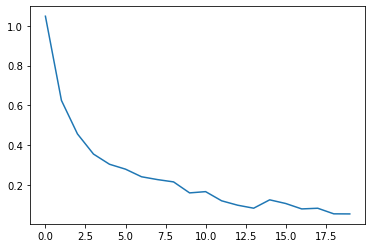

In [29]:
# fig = figsize([7,7])
plt.plot(history.history['loss'])
plt.show()

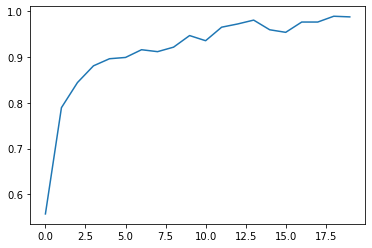

In [30]:
plt.plot(history.history['accuracy'])
plt.show()

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               34048     
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 54,916
Trainable params: 54,916
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_test[0].shape

(132,)

In [33]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [34]:
print(y_pred.shape,y_test.shape)

(80, 4) (80,)


In [35]:
poses = ['goddess','mountain','plank','tree']
poses[np.argmax(y_pred[0])]

'goddess'

In [36]:
prediction = []
for i in range(y_pred.shape[0]):
  prediction.append(np.argmax(y_pred[i]))
# y_pred[]
# np.unique(y_test)

In [38]:
prediction = np.asarray(prediction)
prediction.shape,y_test.shape

((80,), (80,))

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
mse

0.1125

## Implementing the goddess pose testing 

In [40]:
import mediapipe as mp
import cv2

In [42]:
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

In [43]:
def appendrow(results):
  '''
  appends the row data of one image into the dataframe
  '''
  main_list = []
  # total_landmark = len(results.pose_landmarks.landmark)
  for i in range(33):
    x = results.pose_landmarks.landmark[i].x
    y = results.pose_landmarks.landmark[i].y
    z = results.pose_landmarks.landmark[i].z
    label = mp_pose.PoseLandmark(i).name
    visibility = results.pose_landmarks.landmark[i].visibility
    main_list.append(x)
    main_list.append(y)
    main_list.append(z)
    main_list.append(visibility)
  return main_list

In [55]:
def classifier(img,model,pose,poses):
  '''
    img : path to the image
    model : classifier model as an input
    pose : mediapipe/other model which will find the keypoints
    poses : list of the poses on which the classifier is trained on
  '''
  try:
    sample_img = cv2.imread("goddess.png")
    results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    main_list = appendrow(results) # In the list format so converting it to numpy
    result = np.array(main_list)
    result = result.reshape((132,-1)) # for all keypoints
    result = np.transpose(result)
    return poses[np.argmax(model.predict(result,verbose=0))]
  except:
    print("most probably Shape Error")
  

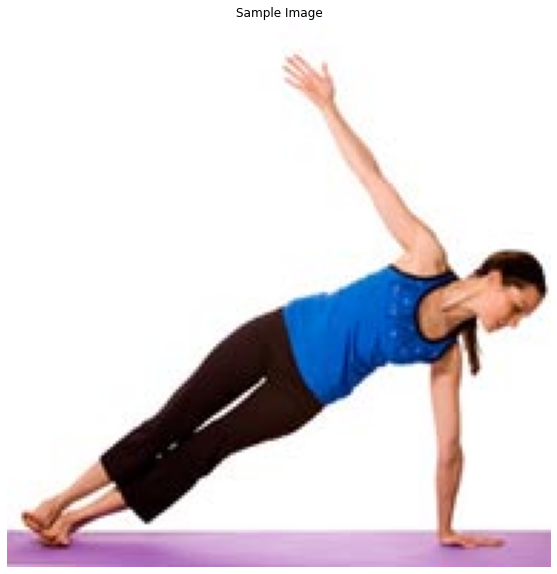

In [62]:
IMG_LINK = 'https://thumbs.dreamstime.com/b/side-view-smiling-sportswoman-doing-plank-exercise-yoga-mat-side-view-smiling-sportswoman-doing-plank-exercise-yoga-119751300.jpg'
IMG_NAME = 'plank.png'
# importing modules
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(IMG_LINK,
  IMG_NAME)
  
# img = Image.open("goddess.png")
sample_img = cv2.imread(IMG_NAME)
sample_img = cv2.imread('DataSet/Train/plank/plank (100).jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [63]:
classifier(sample_img,model,pose,poses)

'goddess'